Source: https://www.itl.nist.gov/div898/handbook/eda/section4/eda429.htm

## Preparation

In [1]:
import os
os.chdir("..")
os.getcwd()

'C:\\Users\\An PC\\jupyter\\eda'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

from utils import datasets
from utils import calculations
from utils.plotting import show_and_save_plot
from plots import four_plot, run_sequence_plot, histogram, lag_plot, probability_plot, \
                  autocorrelation_plot, weibull_plot

---

# Fatigue Life of Aluminum Alloy Specimens
This example illustrates the univariate analysis of the fatigue life of aluminum alloy specimens.
1. [Background and Data](#background)
2. [Graphical Output and Interpretation](#graphical)

---

## <a name="background"></a>Background and Data
### Generation 
This data set comprises measurements of fatigue life (thousands of cycles until rupture) of rectangular strips of 6061-T6 aluminum sheeting, subjected to periodic loading with maximum stress of 21,000 psi (pounds per square inch), as reported by Birnbaum and Saunders (1958).

### Purpose of Analysis
The goal of this case study is to select a probabilistic model, from among several reasonable alternatives, to describe the dispersion of the resulting measured values of life-length.

The original study, in the field of statistical reliability analysis, was concerned with the prediction of failure times of a material subjected to a load varying in time. It was well-known that a structure designed to withstand a particular static load may fail sooner than expected under a dynamic load.

If a realistic model for the probability distribution of lifetime can be found, then it can be used to estimate the time by which a part or structure needs to be replaced to guarantee that the probability of failure does not exceed some maximum acceptable value, for example 0.1%, while it is in service.

The chapter that is concerned with the assessment of product reliability contains additional material on statistical methods used in reliability analysis. This case study is meant to complement that chapter by showing the use of graphical and other techniques in the model selection stage of such analysis.

When there is no cogent reason to adopt a particular model, or when none of the models under consideration seems adequate for the purpose, one may opt for a non-parametric statistical method, for example to produce tolerance bounds or confidence intervals.

A non-parametric method does not rely on the assumption that the data are like a sample from a particular probability distribution that is fully specified up to the values of some adjustable parameters. For example, the Gaussian probability distribution is a parametric model with two adjustable parameters.

The price to be paid when using non-parametric methods is loss of efficiency, meaning that they may require more data for statistical inference than a parametric counterpart would, if applicable. For example, non-parametric confidence intervals for model parameters may be considerably wider than what a confidence interval would need to be if the underlying distribution could be identified correctly. Such identification is what we will attempt in this case study.

It should be noted—a point that we will stress later in the development of this case study— that the very exercise of selecting a model often contributes substantially to the uncertainty of the conclusions derived after the selection has been made.

### Data source
https://www.itl.nist.gov/div898/handbook/datasets/BIRNSAUN.DAT

In [3]:
df = datasets.load_fatigue_life()
df.head()

,y
0,370
1,1016
2,1235
3,1419
4,1567


---

## <a name="graphical"></a>Graphical Output and Interpretation
### Goal
The goal of this analysis is to select a probabilistic model to describe the dispersion of the measured values of fatigue life of specimens of an aluminum alloy from among several reasonable alternatives.

### Initial Plots of the Data
Simple diagrams can be very informative about location, spread, and to detect possibly anomalous data values or particular patterns (clustering, for example). These include dot-charts, boxplots, and histograms. Since building an effective histogram requires that a choice be made of bin size, and this choice can be influential, one may wish to examine a non-parametric estimate of the underlying probability density.

![](https://www.itl.nist.gov/div898/handbook/eda/section4/eda4292_r01.gif)

In [4]:
# Placeholder

These several plots variously show that the measurements range from a value slightly greater than 350,000 to slightly less than 2,500,000 cycles. The boxplot suggests that the largest measured value may be an outlier.

A recommended first step is to check consistency between the data and what is to be expected if the data were a sample from a particular probability distribution. Knowledge about the underlying properties of materials and of relevant industrial processes typically offer clues as to the models that should be entertained. Graphical diagnostic techniques can be very useful at this exploratory stage: foremost among these, for univariate data, is the quantile-quantile plot, or QQ-plot ([Wilk and Gnanadesikan, 1968](https://www.itl.nist.gov/div898/handbook/eda/section4/eda43.htm#Wilk)).

Each data point is represented by one point in the QQ-plot. The ordinate of each of these points is one data value; if this data value happens to be the *k*th order statistic in the sample (that is, the *k*th largest value), then the corresponding abscissa is the "typical" value that the *k*th largest value should have in a sample of the same size as the data, drawn from a particular distribution. If *F* denotes the cumulative probability distribution function of interest, and the sample comprises *n* values, then $F^{-1}\left(\frac{k-\frac{1}{2}}{n+\frac{1}{2}}\right)$ is a reasonable choice for that "typical" value, because it is an approximation to the median of the *k*th order statistic in a sample of size *n* from this distribution.

The following figure shows a QQ-plot of our data relative to the Gaussian (or, normal) probability distribution. If the data matched expectations perfectly, then the points would all fall on a straight line.

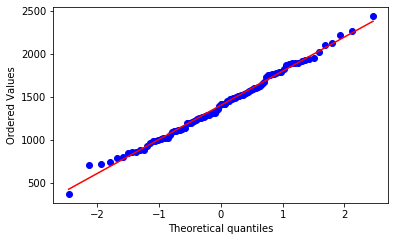

In [5]:
_, _, = probability_plot(df["y"])

In practice, one needs to gauge whether the deviations from such perfect alignment are commensurate with the natural variability associated with sampling. This can easily be done by examining how variable QQ-plots of samples from the target distribution may be.

The following figure shows, superimposed on the QQ-plot of the data, the QQ-plots of 99 samples of the same size as the data, drawn from a Gaussian distribution with the same mean and standard deviation as the data.

![](https://www.itl.nist.gov/div898/handbook/eda/section4/eda4292_r03.gif)

In [6]:
# Placeholder

The fact that the cloud of QQ-plots corresponding to 99 samples from the Gaussian distribution effectively covers the QQ-plot for the data, suggests that the chances are better than 1 in 100 that our data are inconsistent with the Gaussian model.

This proves nothing, of course, because even the rarest of events may happen. However, it is commonly taken to be indicative of an acceptable fit for general purposes. In any case, one may naturally wonder if an alternative model might not provide an even better fit.

Knowing the provenance of the data, that they portray strength of a material, strongly suggests that one may like to examine alternative models, because in many studies of reliability non-Gaussian models tend to be more appropriate than Gaussian models.

### Candidate Distributions
There are many probability distributions that could reasonably be entertained as candidate models for the data. However, we will restrict ourselves to consideration of the following because these have proven to be useful in reliability studies.
* [Normal distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm)
* [Gamma distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366b.htm)
* Birnbaum-Saunders distribution
* [3-parameter Weibull distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3668.htm)

### Approach
A very simple approach amounts to comparing QQ-plots of the data for the candidate models under consideration. This typically involves first fitting the models to the data, for example employing the [method of maximum likelihood](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3652.htm).

The maximum likelihood estimates are the following:
* Gaussian: mean 1401, standard deviation 389
* Gamma: shape 11.85, rate 0.00846
* Birnbaum-Saunders: shape 0.310, scale 1337
* 3-parameter Weibull: location 181, shape 3.43, scale 1357

The following figure shows how close (or how far) the best fitting probability densities of the four distributions approximate the non-parametric probability density estimate. This comparison, however, takes into account neither the fact that our sample is fairly small (101 measured values), nor that the fitted models themselves have been estimated from the same data that the non-parametric estimate was derived from.

![](https://www.itl.nist.gov/div898/handbook/eda/section4/eda4292_r04.gif)

In [7]:
# Placeholder

These limitations notwithstanding, it is worth examining the corresponding QQ-plots, shown below, which suggest that the Gaussian and the 3-parameter Weibull may be the best models.

![](https://www.itl.nist.gov/div898/handbook/eda/section4/eda4292_r05.gif)

In [8]:
# Placeholder

### Model Selection
A more careful comparison of the merits of the alternative models needs to take into account the fact that the 3-parameter Weibull model (precisely because it has three parameters), may be intrinsically more flexible than the others, which all have two adjustable parameters only.

Two criteria can be employed for a formal comparison: Akaike's Information Criterion (AIC), and the Bayesian Information Criterion (BIC) ([Hastie et. al., 2001](https://www.itl.nist.gov/div898/handbook/eda/section4/eda43.htm#Hastie)). The smaller the value of either model selection criterion, the better the model:

` #   AIC  BIC`

` GAU 1495 1501`

` GAM 1499 1504`

` BS  1507 1512`

` WEI 1498 1505`

On this basis (and according both to AIC and BIC), there seems to be no cogent reason to replace the Gaussian model by any of the other three. The values of BIC can also be used to derive an approximate answer to the question of how strongly the data may support each of these models. Doing this involves the application of [Bayesian statistical methods](https://www.itl.nist.gov/div898/handbook/apr/section1/apr1a.htm).

We start from an *a priori* assignment of equal probabilities to all four models, indicating that we have no reason to favor one over another at the outset, and then update these probabilities based on the measured values of lifetime. The updated probabilities of the four models, called their *posterior probabilities*, are approximately proportional to $\mathrm{e}^{-\frac{\mathrm{BIC}(\mathrm{GAU})}{2}}$, $\mathrm{e}^{-\frac{\mathrm{BIC}(\mathrm{GAM})}{2}}$, $\mathrm{e}^{-\frac{\mathrm{BIC}(\mathrm{BS})}{2}}$, and $\mathrm{e}^{-\frac{\mathrm{BIC}(\mathrm{WEI})}{2}}$. The values are 76% for GAU, 16% for GAM, 0.27% for BS, and 7.4% for WEI.

One possible use for the selected model is to answer the question of the age in service by which a part or structure needs to be replaced to guarantee that the probability of failure does not exceed some maximum acceptable value, for example 0.1%.The answer to this question is the 0.1st percentile of the fitted distribution, that is $G^{-1}(0.001)$ = 198 thousand cycles, where, in this case, $G^{-1}$ denotes the inverse of the fitted, Gaussian probability distribution.

To assess the uncertainty of this estimate one may employ the [statistical bootstrap](https://www.itl.nist.gov/div898/handbook/eda/section3/eda334.htm). In this case, this involves drawing a suitably large number of bootstrap samples from the data, and for each of them applying the model fitting and model selection exercise described above, ending with the calculation of $G^{-1}(0.001)$ for the best model (which may vary from sample to sample).

The bootstrap samples should be of the same size as the data, with each being drawn uniformly at random from the data, *with* replacement. This process, based on 5,000 bootstrap samples, yielded a 95% confidence interval for the 0.1st percentile ranging from 40 to 366 thousands of cycles. The large uncertainty is not surprising given that we are attempting to estimate the largest value that is exceeded with probability 99.9%, based on a sample comprising only 101 measured values.

### Prediction Intervals
One more application in this analysis is to evaluate prediction intervals for the fatigue life of the aluminum alloy specimens. For example, if we were to test three new specimens using the same process, we would want to know (with 95% confidence) the minimum number of cycles for these three specimens. That is, we need to find a statistical interval $[L, +\infty]$ that contains the fatigue life of all three future specimens with 95% confidence. The desired interval is a one-sided, lower 95% prediction interval. Since tables of factors for constructing *L*, are widely available for normal models, we use the results corresponding to the normal model here for illustration. Specifically, *L* is computed as

$$L = \bar{x} + r s$$
$$L = 1400.91 - 2.16 \times 391.32 = 555.66 \text{ cycles } \times 1000$$

where factor *r* is given in Table A.14 of [Hahn and Meeker (1991)](https://www.itl.nist.gov/div898/handbook/eda/section4/eda43.htm#Hahn) or can be obtained from an [R program](https://www.itl.nist.gov/div898/handbook/eda/section4/eda4292_rcode.r).

---